In [10]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 1.7MB/s 
     |████████████████████████████████| 501kB 51.9MB/s 
     |████████████████████████████████| 3.1MB 55.7MB/s 


In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [12]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(128)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(128)

In [0]:
class NeuralNetwork(Model):
  def __init__(self,Layer1,Layer2,Layer3,Layer4,Output_size):
      super(NeuralNetwork, self).__init__()
      self.layer1 = Dense(Layer1,activation = tf.nn.relu)
      self.layer2 = Dense(Layer2,activation = tf.nn.relu)
      self.layer3 = Dense(Layer3,activation = tf.nn.relu)
      self.layer4 = Dense(Layer4,activation = tf.nn.relu)
      self.output_layer = Dense(Output_size,activation = tf.nn.softmax)
      self.flatten = Flatten()   
  def call(self,inputs):
      inputs = self.flatten(inputs)
      x = self.layer1(inputs)
      x = self.layer2(x)
      x = self.layer3(x)
      x = self.layer4(x)
      logits = self.output_layer(x)
      return logits


In [0]:
model = NeuralNetwork(1000,1000,500,200,10)

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [0]:
def train_step(model, train_ds):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.Accuracy()
  for images, labels in train_ds:
    with tf.GradientTape() as tape:
      predictions = model(images)
      loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    epoch_loss_avg(loss)
    epoch_accuracy(tf.argmax(predictions, axis=1, output_type=tf.int64), labels)
  
  return epoch_loss_avg.result().numpy(), epoch_accuracy.result().numpy()

In [0]:
def test_step(model, test_ds):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.Accuracy()
  for images,labels in test_ds:
    predictions = model(images)
    test_loss = loss_object(labels, predictions)
    epoch_loss_avg(test_loss)
    epoch_accuracy(tf.argmax(predictions, axis=1, output_type=tf.int64), labels)
  return epoch_loss_avg.result().numpy(), epoch_accuracy.result().numpy()

In [19]:
EPOCHS = 10
Train_Accuracies = []
Train_Losses = []
Test_Accuracies = []
Test_Losses = []
for epoch in range(EPOCHS):
  train_acc_per_epoch = 0
  test_acc_per_epoch = 0
  train_loss_per_epoch = 0
  test_loss_per_epoch = 0
  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  
  train_loss_per_epoch, train_acc_per_epoch = train_step(model,train_ds)
  test_loss_per_epoch ,test_acc_per_epoch = test_step(model,test_ds)
  
  Train_Accuracies.append(train_acc_per_epoch)
  Train_Losses.append(train_loss_per_epoch)
  Test_Accuracies.append(test_acc_per_epoch)
  Test_Losses.append(test_loss_per_epoch)
  print (template.format(epoch+1,
                         train_loss_per_epoch,
                         train_acc_per_epoch,
                         test_loss_per_epoch,
                        test_acc_per_epoch))

W0712 20:14:55.831064 140552502949760 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1220: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1, Loss: 0.20357121527194977, Accuracy: 0.9384333491325378, Test Loss: 0.12384222447872162, Test Accuracy: 0.9609000086784363
Epoch 2, Loss: 0.08435087651014328, Accuracy: 0.9744499921798706, Test Loss: 0.09624556452035904, Test Accuracy: 0.9745000004768372
Epoch 3, Loss: 0.05721741542220116, Accuracy: 0.9825999736785889, Test Loss: 0.10868798941373825, Test Accuracy: 0.9708999991416931
Epoch 4, Loss: 0.04367479681968689, Accuracy: 0.9862333536148071, Test Loss: 0.08653737604618073, Test Accuracy: 0.9771999716758728
Epoch 5, Loss: 0.0368448868393898, Accuracy: 0.9889000058174133, Test Loss: 0.09056279063224792, Test Accuracy: 0.9757000207901001
Epoch 6, Loss: 0.03025904670357704, Accuracy: 0.9902499914169312, Test Loss: 0.0935288742184639, Test Accuracy: 0.9779999852180481
Epoch 7, Loss: 0.026884257793426514, Accuracy: 0.9919666647911072, Test Loss: 0.07580993324518204, Test Accuracy: 0.9811000227928162
Epoch 8, Loss: 0.02519560605287552, Accuracy: 0.9925000071525574, Test Loss: 

In [0]:
model.save_weights('MnistModel.h5', save_format='h5')

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0, 0.5, 'Training Loss')

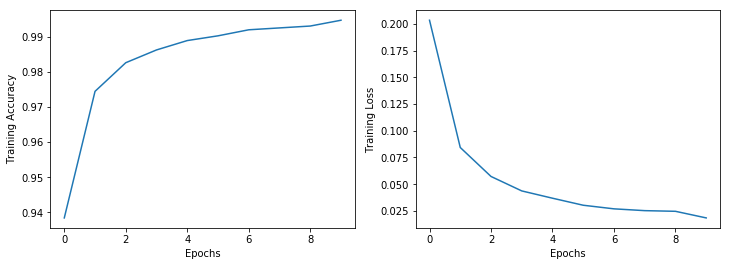

In [22]:
plt.figure(1,figsize=(12,4))
plt.subplot(121)
plt.plot(Train_Accuracies)
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.subplot(122)
plt.plot(Train_Losses)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")

Text(0, 0.5, 'Testing Loss')

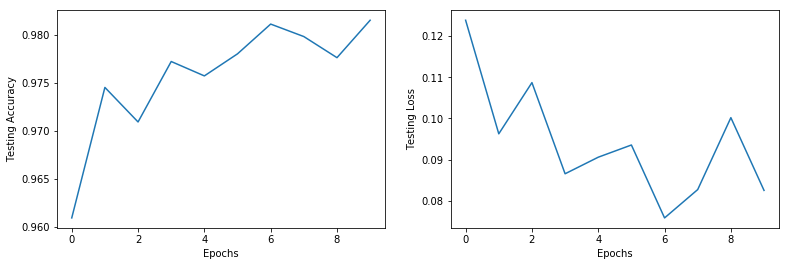

In [25]:
plt.figure(2,figsize=(20,4))
plt.subplot(131)
plt.plot(Test_Accuracies)
plt.xlabel("Epochs")
plt.ylabel("Testing Accuracy")
plt.subplot(132)
plt.plot(Test_Losses)
plt.xlabel("Epochs")
plt.ylabel("Testing Loss")

In [0]:
model.load_weights("MnistModel.h5")
Weights = []
for i in range(0,len(model.trainable_weights),2):
    Weights.append(model.trainable_weights[i].numpy().reshape(-1))

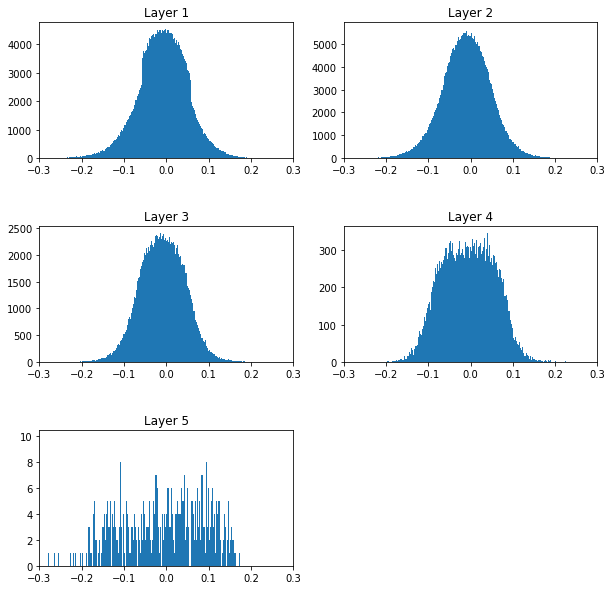

In [69]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
for i, weights in enumerate(Weights):
    plt.subplot(3,2,i+1)
    plt.title("Layer"+" "+str(i+1))
    plt.hist(weights, bins=1000)
    plt.xlim(-0.3, 0.3);

# Statistical Report for each Layer about the data observation:


1.   Mean
2.   Standard Dev
3.   Type of distrubtion





In [33]:
def Basic_Statistical_Report(Weights):
    
    for i,Weight in enumerate(Weights):
      Mean = np.mean(Weight)
      Std = np.std(Weight)
      Print_template= 'Layer {}: Mean: {}, Std: {}'
      
      print(Print_template.format(
      i+1,
      Mean,Std))

Basic_Statistical_Report(Weights)



Layer 1: Mean: -0.008200440330556532, Std: 0.059108617511026314
Layer 2: Mean: -0.009900525255296343, Std: 0.056981084410535905
Layer 3: Mean: -0.008954245680035505, Std: 0.05296796916072124
Layer 4: Mean: -0.006704087881199297, Std: 0.06192349750581777
Layer 5: Mean: -0.008044901284915657, Std: 0.09855035633831075


In [34]:
Print_template= 'Layer {}: Distrubtion Type: {}'
print(Print_template.format(1,"Normal Distrubtion"))
print(Print_template.format(2,"Normal Distrubtion"))
print(Print_template.format(3,"Normal Distrubtion"))
print(Print_template.format(4,"Normal Distrubtion"))
print(Print_template.format(5,"Nearly Uniform Distrubtion"))

Layer 1: Distrubtion Type: Normal Distrubtion
Layer 2: Distrubtion Type: Normal Distrubtion
Layer 3: Distrubtion Type: Normal Distrubtion
Layer 4: Distrubtion Type: Normal Distrubtion
Layer 5: Distrubtion Type: Nearly Uniform Distrubtion


In [35]:
x = np.array([-0.1,0.1,-0.2,0.2,0.3,-0.3])
x[(x < 0.2) & (x > -0.2)] = 0 #check correct
x

array([ 0. ,  0. , -0.2,  0.2,  0.3, -0.3])

In [0]:
def Pruning(Layer_Weight,Percentage):
  temp_Weight = Layer_Weight
  temp_Weight = temp_Weight.reshape(-1)
  temp_Weight = np.abs(temp_Weight)
  temp_Weight.sort()
  length = temp_Weight.size
  index = Percentage * length
  Pruning_number = temp_Weight[int(index)]
  Layer_Weight[(Pruning_number > Layer_Weight) & (-Pruning_number < Layer_Weight)] = 0
  return Layer_Weight

In [37]:
percentages = [0, 0.25, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.97, 0.99]
model.load_weights("MnistModel.h5")
pruned_test_accuracy_plot = []
pruned_test_loss_plot = []
for percent in percentages:
  for i in range(1,5):
      weight = model.layers[i].get_weights()[0]
      pruned_weight = Pruning(weight,percent)
      model.layers[i].set_weights([pruned_weight,model.layers[i].get_weights()[1]])
      
  template = 'Pruning Percentage {},  Test Loss: {}, Test Accuracy: {}'
  test_loss,test_acc = test_step(model,test_ds)
  print (template.format(percent * 100,
                         test_loss,
                        test_acc))
  pruned_test_accuracy_plot.append(test_acc*100) 
  pruned_test_loss_plot.append(test_loss)

Pruning Percentage 0,  Test Loss: 0.08249686658382416, Test Accuracy: 0.9815000295639038
Pruning Percentage 25.0,  Test Loss: 0.08180734515190125, Test Accuracy: 0.9812999963760376
Pruning Percentage 50.0,  Test Loss: 0.0752110630273819, Test Accuracy: 0.9807999730110168
Pruning Percentage 60.0,  Test Loss: 0.09060461074113846, Test Accuracy: 0.9775000214576721
Pruning Percentage 70.0,  Test Loss: 0.11823315173387527, Test Accuracy: 0.977400004863739
Pruning Percentage 80.0,  Test Loss: 0.33933183550834656, Test Accuracy: 0.9797000288963318
Pruning Percentage 90.0,  Test Loss: 1.5051441192626953, Test Accuracy: 0.8047999739646912
Pruning Percentage 95.0,  Test Loss: 2.102543592453003, Test Accuracy: 0.3564999997615814
Pruning Percentage 97.0,  Test Loss: 2.2565362453460693, Test Accuracy: 0.09740000218153
Pruning Percentage 99.0,  Test Loss: 2.3038389682769775, Test Accuracy: 0.09740000218153


Text(0, 0.5, 'Testing Accuracy')

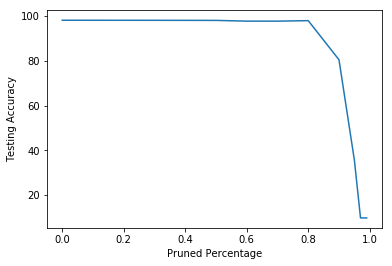

In [38]:
plt.figure()
plt.plot(percentages,pruned_test_accuracy_plot)
plt.xlabel("Pruned Percentage")
plt.ylabel("Testing Accuracy")

Text(0, 0.5, 'Testing Loss')

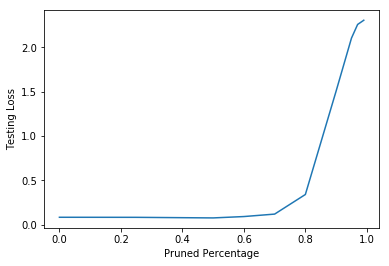

In [39]:
plt.figure()
plt.plot(percentages,pruned_test_loss_plot)
plt.xlabel("Pruned Percentage")
plt.ylabel("Testing Loss")

In [40]:
x = np.array([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]])
np.linalg.norm(x,axis=0) #axis =0 means that the np object will sum over the rows ,check

array([1.73205081, 3.46410162, 5.19615242, 6.92820323, 8.66025404])

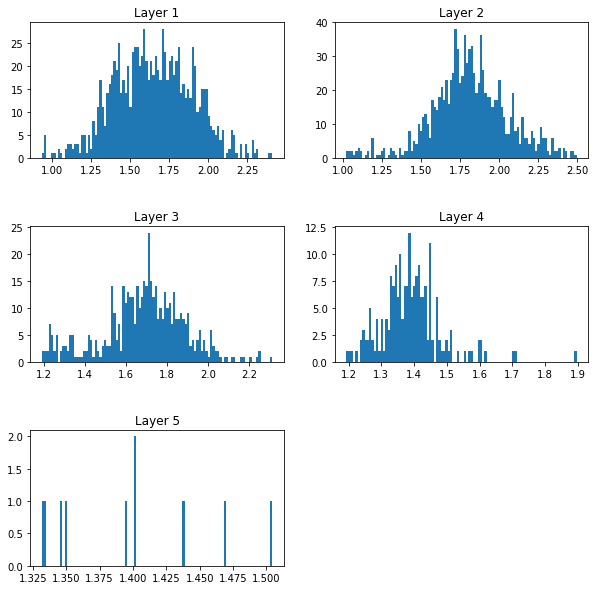

In [76]:
model.load_weights("MnistModel.h5")
L2Weights = []

for i in range(0,len(model.trainable_weights),2):
    L2Weights.append(model.trainable_weights[i].numpy())

plt.figure( figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
for i, w in enumerate(L2Weights):
    weights = np.linalg.norm(w,axis=0)
    plt.subplot(3,2,i+1)
    plt.title("Layer"+" "+str(i+1))
    plt.hist(weights, bins=100);

In [0]:
def Neuron_Pruning(Weight,Percentage):
  
    Temp_Weights = Weight
    
    Unordered_L2Norm = np.linalg.norm(Temp_Weights,axis=0)
    Ordered_L2Norm = np.sort(Unordered_L2Norm)
    length = Ordered_L2Norm.size
    
    Pruning_Value = Ordered_L2Norm[int(length * Percentage)]
    
    for column in range(Weight.shape[1]):
        
        if (Unordered_L2Norm[column] < Pruning_Value):
            Weight[:,column] = 0
            
    return Weight

In [42]:
percentages = [0, 0.25, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.97, 0.99]
model.load_weights("MnistModel.h5")
Neuron_pruned_test_accuracy_plot = []
Neuron_pruned_test_loss_plot = []
for percent in percentages:
  for i in range(1,5):
      weight = model.layers[i].get_weights()[0]
      pruned_weight = Neuron_Pruning(weight,percent)
      model.layers[i].set_weights([pruned_weight,model.layers[i].get_weights()[1]])
      
  template = 'Neuron Pruning Percentage {},  Test Loss: {}, Test Accuracy: {}'
  test_loss,test_acc = test_step(model,test_ds)
  print (template.format(percent * 100,
                         test_loss,
                        test_acc))
  Neuron_pruned_test_accuracy_plot.append(test_acc*100) 
  Neuron_pruned_test_loss_plot.append(test_loss)

Neuron Pruning Percentage 0,  Test Loss: 0.08249686658382416, Test Accuracy: 0.9815000295639038
Neuron Pruning Percentage 25.0,  Test Loss: 0.9402592182159424, Test Accuracy: 0.7857999801635742
Neuron Pruning Percentage 50.0,  Test Loss: 1.213350534439087, Test Accuracy: 0.5443999767303467
Neuron Pruning Percentage 60.0,  Test Loss: 1.2709108591079712, Test Accuracy: 0.4909999966621399
Neuron Pruning Percentage 70.0,  Test Loss: 1.6243971586227417, Test Accuracy: 0.3824999928474426
Neuron Pruning Percentage 80.0,  Test Loss: 2.082149028778076, Test Accuracy: 0.27480000257492065
Neuron Pruning Percentage 90.0,  Test Loss: 2.293003797531128, Test Accuracy: 0.09740000218153
Neuron Pruning Percentage 95.0,  Test Loss: 2.3015804290771484, Test Accuracy: 0.09740000218153
Neuron Pruning Percentage 97.0,  Test Loss: 2.3044276237487793, Test Accuracy: 0.09740000218153
Neuron Pruning Percentage 99.0,  Test Loss: 2.3044276237487793, Test Accuracy: 0.09740000218153


Text(0, 0.5, 'Testing Accuracy')

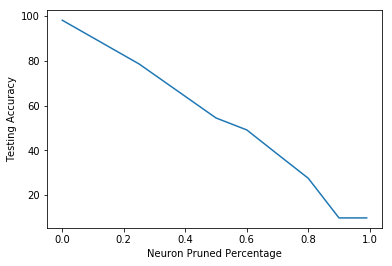

In [44]:
plt.figure()
plt.plot(percentages,Neuron_pruned_test_accuracy_plot)
plt.xlabel("Neuron Pruned Percentage")
plt.ylabel("Testing Accuracy")

Text(0, 0.5, 'Testing Loss')

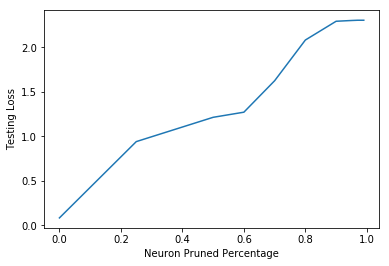

In [45]:
plt.figure()
plt.plot(percentages,Neuron_pruned_test_loss_plot)
plt.xlabel("Neuron Pruned Percentage")
plt.ylabel("Testing Loss")

# Comparing between all losses and accuracy for the two Pruning Techniques

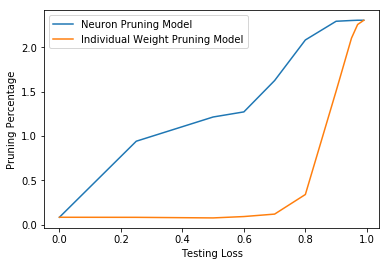

In [48]:
plt.figure()
plt.plot(percentages, Neuron_pruned_test_loss_plot , label='Neuron Pruning Model')
plt.plot(percentages, pruned_test_loss_plot , label='Individual Weight Pruning Model')
plt.xlabel("Testing Loss")
plt.ylabel("Pruning Percentage")
plt.legend()

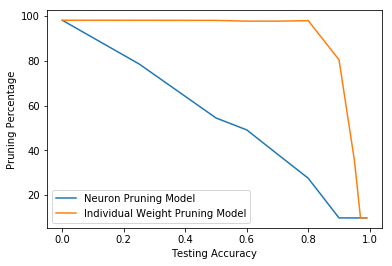

In [49]:
plt.figure()
plt.plot(percentages, Neuron_pruned_test_accuracy_plot , label='Neuron Pruning Model')
plt.plot(percentages, pruned_test_accuracy_plot , label='Individual Weight Pruning Model')
plt.xlabel("Testing Accuracy")
plt.ylabel("Pruning Percentage")
plt.legend()

# Final Report and Findings



*   The Weight Pruning method decay in performance is slower than the Neuron Pruning method , and i believe that is the case because Neuron Pruning removes whole connections weakenning the network and weight pruning on the other side focuses on each weight seperately.
*   I learned that kind of 50%-60% of the network weights are useless as when they are removed in the weight pruning , the performance stayed the same and i even considered that the network performance is kind of acceptable with 75%-80% pruned as the tradeoff between size and accuracy is tradeable here.
*   And In addition , the plot of weights and statistical report showed that the weights has mean of nearly 0 and a very small standard deviation of nearly 0.04-0.07 which also means that majority of weights are not contributing in the output.
*   Distrubtion of weights corresponding to their L2 Norm shows that weights are distrubted slightly uniformly so removing large portions according to L2 Norm would affect the network greatly.
*  I actually learned alot from these experiments and i actually thought that the whole network contributes to the output.





